## W207 Exploratory Visualization - 16th June 2021 Summer

### Team Members - Jeffrey Adams, Pow Chang, Sweta Bhattacharya, Matt White

### Hypothesis 1: Cryptocurrency market trends mirror traditional markets

In [36]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
print("pd", pd.__version__)
print("alt", alt.__version__)
# alt.data_transformers.disable_max_rows()

alt.data_transformers.enable('data_server')
# alt.data_transformers.enable('json')
# alt.renderers.enable('default')
from altair_saver import save
# alt.renderers.enable('altair_saver', fmts=['vega-lite', 'png']);
import warnings
warnings.filterwarnings("ignore")


pd 1.1.5
alt 4.1.0


## This cell is for Yahoo Finance API, Just need to run once for updating dataset

[*********************100%***********************]  15 of 15 completed


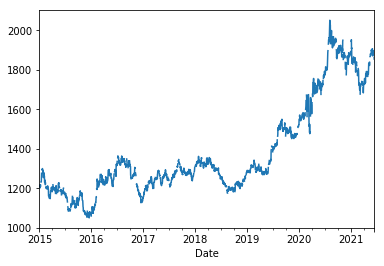

In [37]:
import yfinance as yf  
import matplotlib.pyplot as plt
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
tickers = ['BTC-USD','ETH-USD', 'AAPL', 'TSLA', 'MSFT', 'NVDA', 'SQ', 'PYPL', 'MSTR', 'JPM', '^IXIC', '^DJI', '^GSPC', 'GC=F', 'CL=F']
data = yf.download(tickers,'2015-01-01','2021-06-15')
# Plot the close prices
data["Adj Close"]['GC=F'].plot()
plt.show()

In [38]:
data

Adj Close                                                     \
                  AAPL       BTC-USD       CL=F      ETH-USD         GC=F   
Date                                                                        
2015-01-01         NaN    314.248993        NaN          NaN          NaN   
2015-01-02   24.819241    315.032013  52.689999          NaN  1186.000000   
2015-01-03         NaN    281.082001        NaN          NaN          NaN   
2015-01-04         NaN    264.195007        NaN          NaN          NaN   
2015-01-05   24.120045    274.473999  50.040001          NaN  1203.900024   
...                ...           ...        ...          ...          ...   
2021-06-11  127.349998  37334.398438  70.910004  2353.768799  1877.400024   
2021-06-12         NaN  35552.515625        NaN  2372.484375          NaN   
2021-06-13         NaN  39097.859375        NaN  2508.391602          NaN   
2021-06-14  130.479996  40218.476562  70.879997  2537.891113  1864.000000   
2021-06-15         NaN  40406.269531  72.120003  2610.936768  1854.500000   

                                                                        ...  \
                   JPM        MSFT        MSTR        NVDA        PYPL  ...   
Date                                                                    ...   
2015-01-01         NaN         NaN         NaN         NaN         NaN  ...   
2015-01-02   52.506710   41.348206  163.119995   19.363665         NaN  ...   
2015-01-03         NaN         NaN         NaN         NaN         NaN  ...   
2015-01-04         NaN         NaN         NaN         NaN         NaN  ...   
2015-01-05   50.876637   40.967976  162.979996   19.036613         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2021-06-11  160.289993  257.890015  516.440002  713.010010  271.450012  ...   
2021-06-12         NaN         NaN         NaN         NaN         NaN  ...   
2021-06-13         NaN         NaN         NaN         NaN         NaN  ...   
2021-06-14  157.570007  259.890015  598.489990  720.750000  274.929993  ...   
2021-06-15         NaN         NaN         NaN         NaN         NaN  ...   

                Volume                                                \
                   JPM        MSFT       MSTR        NVDA       PYPL   
Date                                                                   
2015-01-01         NaN         NaN        NaN         NaN        NaN   
2015-01-02  12600000.0  27913900.0    45000.0   2842000.0        NaN   
2015-01-03         NaN         NaN        NaN         NaN        NaN   
2015-01-04         NaN         NaN        NaN         NaN        NaN   
2015-01-05  20100600.0  39673900.0    76500.0   4948800.0        NaN   
...                ...         ...        ...         ...        ...   
2021-06-11  13683800.0  18999700.0   500400.0  10407700.0  4490500.0   
2021-06-12         NaN         NaN        NaN         NaN        NaN   
2021-06-13         NaN         NaN        NaN         NaN        NaN   
2021-06-14  19917900.0  19150500.0  1557300.0   8034400.0  5174200.0   
2021-06-15         NaN         NaN        NaN         NaN        NaN   

                                                                             
                    SQ        TSLA         ^DJI         ^GSPC         ^IXIC  
Date                                                                         
2015-01-01         NaN         NaN          NaN           NaN           NaN  
2015-01-02         NaN  23822000.0   76270000.0  2.708700e+09  1.435150e+09  
2015-01-03         NaN         NaN          NaN           NaN           NaN  
2015-01-04         NaN         NaN          NaN           NaN           NaN  
2015-01-05         NaN  26842500.0  116160000.0  3.799120e+09  1.794470e+09  
...                ...         ...          ...           ...           ...  
2021-06-11   7530300.0  16165000.0  260840000.0  3.204280e+09  4.140190e+09  
2021-06-12         NaN         NaN    

In [39]:
df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])


In [40]:
df.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

In [41]:
df.set_index('Date', inplace = True)

In [42]:
df = df.rename(columns = {'Adj Close':'Adj_Close'})

In [43]:
df

,Symbol,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,,
2015-01-02,AAPL,24.819241,27.332500,27.860001,26.837500,27.847500,2.128184e+08
2015-01-05,AAPL,24.120045,26.562500,27.162500,26.352501,27.072500,2.571420e+08
2015-01-06,AAPL,24.122320,26.565001,26.857500,26.157499,26.635000,2.631884e+08
2015-01-07,AAPL,24.460564,26.937500,27.049999,26.674999,26.799999,1.604236e+08
2015-01-08,AAPL,25.400398,27.972500,28.037500,27.174999,27.307501,2.374580e+08
...,...,...,...,...,...,...,...
2021-06-08,^IXIC,13924.910156,13924.910156,13981.719727,13831.980469,13946.320312,5.894140e+09
2021-06-09,^IXIC,13911.750000,13911.750000,14003.500000,13906.450195,13980.230469,5.607720e+09
2021-06-10,^IXIC,14020.330078,14020.330078,14031.190430,13904.400391,13933.879883,4.889500e+09


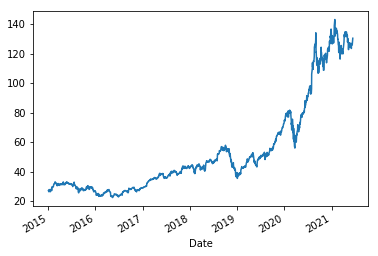

In [44]:
df[df.Symbol == 'AAPL']['Close'].plot()

In [45]:
df.reset_index(inplace = True)

In [46]:
df

,Date,Symbol,Adj_Close,Close,High,Low,Open,Volume
0,2015-01-02,AAPL,24.819241,27.332500,27.860001,26.837500,27.847500,2.128184e+08
1,2015-01-05,AAPL,24.120045,26.562500,27.162500,26.352501,27.072500,2.571420e+08
2,2015-01-06,AAPL,24.122320,26.565001,26.857500,26.157499,26.635000,2.631884e+08
3,2015-01-07,AAPL,24.460564,26.937500,27.049999,26.674999,26.799999,1.604236e+08
4,2015-01-08,AAPL,25.400398,27.972500,28.037500,27.174999,27.307501,2.374580e+08
...,...,...,...,...,...,...,...,...
25212,2021-06-08,^IXIC,13924.910156,13924.910156,13981.719727,13831.980469,13946.320312,5.894140e+09
25213,2021-06-09,^IXIC,13911.750000,13911.750000,14003.500000,13906.450195,13980.230469,5.607720e+09
25214,2021-06-10,^IXIC,14020.330078,14020.330078,14031.190430,13904.400391,13933.879883,4.889500e+09
25215,2021-06-11,^IXIC,14069.419922,14069.419922,14069.419922,14006.589844,14030.849609,4.140190e+09


## Create some variables here...

In [125]:
# loop through the ticker to calculate the Moving Average for each ticker
def calculate_moving_average(days):
    data = []
    for ticker in tickers:
        ma50 = df.groupby('Symbol').get_group(ticker)["Close"].rolling(days).mean()
        data.append(ma50)
    return pd.concat(data)


In [126]:
df["MA50"] = calculate_moving_average(50)

In [127]:
df["MA100"] = calculate_moving_average(100)

In [129]:
df["MA200"] = calculate_moving_average(200)

In [130]:
# Here we will integrate with d3 selection of range
plot_range = 500

In [131]:
y_range_max = round(df[df.Symbol == 'BTC-USD']['Close'].tail(plot_range).max(),0) + 1000
y_range_min = round(df[df.Symbol == 'BTC-USD']['Close'].tail(plot_range).min(),0) - 1000


In [132]:
Mchart = alt.Chart(df[df.Symbol == 'BTC-USD'].tail(plot_range)).mark_line().encode(
    x = alt.X('Date:T'),
)

In [133]:
layer = alt.layer(
    Mchart.mark_line(color='lightblue').encode(alt.Y('Close:Q', scale = alt.Scale(domain=[y_range_min,y_range_max],clamp=True), title = 'Price (USD)')),
    Mchart.mark_line(color='green').encode(alt.Y('MA50:Q', scale = alt.Scale(domain=[y_range_min,y_range_max], clamp=True))),
    Mchart.mark_line(color='#fdbb84').encode(alt.Y('MA100:Q', scale = alt.Scale(domain=[y_range_min,y_range_max], clamp=True))),
    Mchart.mark_line(color='#e34a33').encode(alt.Y('MA200:Q', scale = alt.Scale(domain=[y_range_min,y_range_max], clamp=True))),
).properties(title='BTC Close Price Vs Moving Average (50-Day, 100-Day, 200-Day)', width = 700)

layer

alt.LayerChart(...)

In [134]:
def wwma(values, n):
    """Source: Investopedia - exponential weighted (EW) functions"""
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(df, n=14):
    """This function calculate ATR
    Average True Range (ATR) is the average of true ranges over the specified period.
    ATR measures volatility, taking into account any gaps in the price movement. 
    Typically, the ATR calculation is based on 14 periods, which can be intraday, 
    daily, weekly, or monthly.
    """
    data = df.copy()
    high = data["High"]
    low = data["Low"]
    close = data["Close"]
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    # return the dfmini, not the whole dataset, it will take years to load
    atr = wwma(tr, n)
    return atr

In [135]:
# # loop through the ticker to calculate ATR value
data = []
for ticker in tickers:
    ATR = atr(df.groupby('Symbol').get_group(ticker), n=14)
    data.append(ATR)
df["ATR"] = pd.concat(data)

In [136]:
# # loop through the ticker to calculate the 10 days returns
data = []
for ticker in tickers:
    dayX10_returns = df.groupby('Symbol').get_group(ticker)["Close"].pct_change(10)
    data.append(dayX10_returns)
df["Returns"] = pd.concat(data)

In [137]:
# # loop through the ticker to calculate the daily range
data = []
for ticker in tickers:
    daily_range = df.groupby('Symbol').get_group(ticker)["High"]-df.groupby('Symbol').get_group(ticker)["Low"]
    data.append(daily_range)
df["Daily_Range"] = pd.concat(data)


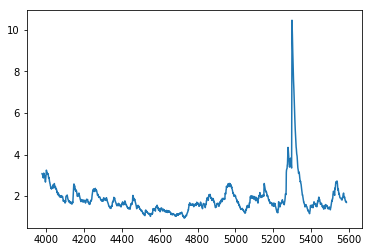

In [138]:
df.groupby('Symbol').get_group('CL=F')['ATR'].plot()

In [139]:
# run once to store the dataset and comment out yfinance to avoid repeat pulling data from API
df.to_csv('PrimeDataSet2021-06-18.csv', index = False)

## **Important Note: All Analysis should start from here...

## Hypothesis 1: Cryptocurrency market trends mirror traditional markets

In [140]:
df = pd.read_csv('PrimeDataSet2021-06-18.csv')

In [141]:
df

,Date,Symbol,Adj_Close,Close,High,Low,Open,Volume,ATR,Returns,Daily_Range,MA50,MA100,MA200
0,2015-01-02,AAPL,24.819241,27.332500,27.860001,26.837500,27.847500,2.128184e+08,1.022501,NaN,1.022501,NaN,NaN,NaN
1,2015-01-05,AAPL,24.120045,26.562500,27.162500,26.352501,27.072500,2.571420e+08,1.019465,NaN,0.809999,NaN,NaN,NaN
2,2015-01-06,AAPL,24.122320,26.565001,26.857500,26.157499,26.635000,2.631884e+08,0.996646,NaN,0.700001,NaN,NaN,NaN
3,2015-01-07,AAPL,24.460564,26.937500,27.049999,26.674999,26.799999,1.604236e+08,0.960100,NaN,0.375000,NaN,NaN,NaN
4,2015-01-08,AAPL,25.400398,27.972500,28.037500,27.174999,27.307501,2.374580e+08,0.970093,NaN,0.862501,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25212,2021-06-08,^IXIC,13924.910156,13924.910156,13981.719727,13831.980469,13946.320312,5.894140e+09,179.813993,0.019306,149.739258,13687.882578,13557.155986,12691.731641
25213,2021-06-09,^IXIC,13911.750000,13911.750000,14003.500000,13906.450195,13980.230469,5.607720e+09,173.902266,0.018641,97.049805,13704.924570,13565.147090,12704.731392
25214,2021-06-10,^IXIC,14020.330078,14020.330078,14031.190430,13904.400391,13933.879883,4.889500e+09,170.537107,0.020551,126.790039,13724.423379,13575.365391,12717.934443
25215,2021-06-11,^IXIC,14069.419922,14069.419922,14069.419922,14006.589844,14030.849609,4.140190e+09,162.843747,0.024253,62.830078,13740.874375,13584.087793,12730.949194


In [142]:
interval = alt.selection_interval()

pchart = alt.Chart(df[df.Symbol == 'BTC-USD'].tail(plot_range)).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(domain=[y_range_min,y_range_max])),
    #tooltip = alt.Tooltip('Close', title = 'Close')
).properties(width = 700, title='Close Price Trend').add_selection(interval)



In [143]:
cchart = alt.Chart(df[df.Symbol == 'BTC-USD'].tail(plot_range)).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('ATR:Q'),
    tooltip = ['Returns'],
    color = alt.condition(
    alt.datum.Returns > 0,
    alt.value('steelblue'),  
    alt.value('orange')   # low return seems correlates more with high volatility, we should study this.
    )
).properties(title = 'ATR Trend by Returns (By Returns)', width = 700).transform_filter(interval)


In [144]:
pchart & cchart

alt.VConcatChart(...)

#### The view shows that cryptocurrenciy Bitcoin has huge upward trend. Dow Jone and Nasdaq have a moderate appreciation over the last five years. Bitcoin seems to have more fluctuation as compared to other assets.

In [145]:
df.Symbol.unique()

array(['AAPL', 'BTC-USD', 'CL=F', 'ETH-USD', 'GC=F', 'JPM', 'MSFT',
       'MSTR', 'NVDA', 'PYPL', 'SQ', 'TSLA', '^DJI', '^GSPC', '^IXIC'],
      dtype=object)

In [146]:
exposure_list = ['BTC-USD', 'CL\=F', 'ETH-USD', 'GC\=F', 'JPM',
       'MSTR', 'NVDA', 'PYPL', 'SQ', 'TSLA']

In [147]:
non_exposure_list = ['AAPL', 'BTC-USD', 'ETH-USD', 'MSFT', '^DJI', '^GSPC', '^IXIC']

In [148]:
exchart = alt.Chart(df[df.Symbol.isin(exposure_list)]).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(type='log'), title = 'Close Price (USD)'),
    color = 'Symbol:N',
    tooltip = ['Symbol', 'Close']
).properties(width = 700, title='BTC-USD Price VS Exposure Assets')

  

In [149]:
zone = pd.DataFrame([
    {
        "start": "2020-02-15",
        "end": "2020-03-16",
        "event": "Market-Dip"
    },
    
])

In [150]:
ruler = alt.Chart(zone).mark_rule(
    color="lightred",
    strokeWidth=40,
    opacity = 0.8
).encode(
    x= alt.X('start:T', title = 'Date'),
    #x2 = alt.X2('end:T'),
).transform_filter(alt.datum.event == "Market-Dip")

In [151]:
ruler + exchart

alt.LayerChart(...)

In [152]:
alt.Chart(df[df.Symbol.isin(non_exposure_list)]).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(type='log'), title = 'Close Price (USD)'),
    color = 'Symbol:N',
    tooltip = ['Symbol', 'Close']
).properties(width = 700, title='BTC-USD Price VS Non-Exposure Assets')

  

alt.Chart(...)

In [153]:
alt.Chart(df[df.Symbol.isin(['BTC-USD','ETH-USD'])]).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(type='log'), title = 'Close Price (USD)'),
    color = 'Symbol:N',
    tooltip = ['Symbol', 'Close']
).properties(width = 700, title='BTC-USD Price VS ETH-USD')

  

alt.Chart(...)

In [154]:
print(list(df.Symbol.unique()))


['AAPL', 'BTC-USD', 'CL=F', 'ETH-USD', 'GC=F', 'JPM', 'MSFT', 'MSTR', 'NVDA', 'PYPL', 'SQ', 'TSLA', '^DJI', '^GSPC', '^IXIC']


In [155]:
df.groupby('Symbol').get_group('CL=F').isna().sum()

Date             0
Symbol           0
Adj_Close        0
Close            0
High             0
Low              0
Open             0
Volume           0
ATR              0
Returns         10
Daily_Range      0
MA50            49
MA100           99
MA200          199
dtype: int64

In [156]:


alt.Chart(df[df.Symbol.isin(['BTC-USD','ETH-USD', 'AAPL', 'TSLA', 'MSFT' '^DJI', '^GSPC', '^IXIC', 'CL\=F', 'GC\='])]).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(type='log'), title = 'Close Price (USD)'),
    color = 'Symbol:N', #scale = alt.Scale(type='log')),
    tooltip = ['Symbol', 'Close']
).properties(width = 700, title='BTC Price Trend Comparison with Other Assets')

   

alt.Chart(...)

In [157]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('Symbol:N'),
    y = alt.Y('sum(Returns):Q'),
    color = 'Symbol:N',
    tooltip = ['Symbol']
).properties(width = 700, title='BTC Returns Comparison with Other Assets')
  

alt.Chart(...)

In [158]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('Symbol:N'),
    y = alt.Y('mean(ATR):Q'),
    color = 'Symbol:N',
    tooltip = ['Symbol']
).properties(width = 700, title='BTC Mean ATR Comparison with Other Assets')
  

alt.Chart(...)

In [159]:
alt.Chart(df).mark_circle().encode(
    x = alt.X('Volume:Q'),
    y = alt.Y('sum(Returns):Q'),
    color = 'Symbol:N',
    #color = 'day(Date:T)'
).properties(width = 700, title='BTC Returns Comparison with Other Assets')
  

alt.Chart(...)

In [160]:
selector = df.Symbol == 'BTC-USD'
plot_range = 500
y_range_max = round(df[selector]['Close'].tail(plot_range).max(),0) + 1000
y_range_min = round(df[selector]['Close'].tail(plot_range).min(),0) - 1000

In [161]:
pvchart = alt.Chart(df[df.Symbol == 'BTC-USD'].tail(plot_range)).mark_circle().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(domain=[y_range_min,y_range_max], type='log')),
    color = alt.condition(
    alt.datum.Returns > 0,
    alt.value('steelblue'),  
    alt.value('orange')),
    tooltip = ['Close', 'Volume']
).properties(width = 700, title='BTC Close Price Trend')


In [162]:
vchart = alt.Chart(df[df.Symbol == 'BTC-USD'].tail(plot_range)).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Volume:Q'),
    color = alt.condition(
    alt.datum.Returns > 0,
    alt.value('steelblue'),  
    alt.value('orange'))   
).properties(title="BTC Volume Trend", width =700)



In [163]:
pvchart & vchart

alt.VConcatChart(...)

In [164]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('Symbol:N'),
    y = alt.Y('Daily_Range:Q'),
    color = 'Symbol:N',
    tooltip = ['Symbol']
).properties(width = 700, title='BTC Daily Range Fluctuation Comparison with Other Assets')
  

alt.Chart(...)

In [165]:
alt.Chart(df).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Daily_Range:Q', title = 'Price (USD)'),
    color = 'Symbol:N',
    tooltip = ['Close', 'Volume']
).properties(width = 700, title='BTC Daily Range VS Other Assets Trend')


alt.Chart(...)

In [166]:
alt.Chart(df[df.Symbol.isin(['BTC-USD','MSTR'])]).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N',
).properties(width = 700, title='BTC and MSTR Returns by Date Overlaid')


alt.Chart(...)

In [167]:
alt.Chart(df[df.Symbol.isin(['BTC-USD','AAPL'])]).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N',
).properties(width = 700, title='BTC and AAPL Returns by Date Overlaid')


alt.Chart(...)

In [168]:


alt.Chart(df[df.Symbol.isin(['BTC-USD','^DJI'])]).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N',
).properties(width = 700, title='BTC and Dow Jone Index Returns')


alt.Chart(...)

In [169]:


alt.Chart(df[df.Symbol.isin(['BTC-USD','^GSPC'])]).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N',
).properties(width = 700, title='BTC and SP500 Index Returns')



alt.Chart(...)

In [170]:
base = alt.Chart(df).encode(
    x = alt.X('Date:T'),
).properties(title = 'Candlestick Chart', width = 700)

## Hypothesis 2: Alt coins are highly correlated with and follow Bitcoin price

#### The view shows that Alt coins are on par with Bitcoin in terms of price percentage performance, there is a great opportunity to invest in alt coins. 

In [171]:

alt.Chart(df[df.Symbol.isin(['BTC-USD','ETH-USD'])]).mark_line().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Close:Q', scale = alt.Scale(type='log'), title = 'Close Price (USD)'),
    color = 'Symbol:N',
    tooltip = ['Symbol', 'Close']
).properties(width = 700, title='BTC-USD Price VS ETH-USD')

  

alt.Chart(...)

#### The view shows that BTC and Alt Coin are very much aligned in the daily returns, this is an insight that alt coin follows the momentum of BTC as they flucture with the highly similar pattern when we overlay their trend lines.

In [172]:
alt.Chart(df[df.Symbol.isin(['BTC-USD','ETH-USD'])]).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N',
).properties(width = 700, title='BTC and ETH Returns by Date Overlaid')


alt.Chart(...)

In [173]:
selector = df.Symbol == 'BTC-USD'
plot_range = 500
y_range_max = round(df[selector]['Volume'].tail(plot_range).max(),0) + 1000
y_range_min = round(df[selector]['Volume'].tail(plot_range).min(),0) - 1000

In [174]:
alt.Chart(df).mark_circle().encode(
    x = alt.X('Returns:Q'),
    y = alt.Y('ATR:Q'),
    color = 'Symbol:N'
).properties(width = 700, title='Returns VS Volume')

alt.Chart(...)

## Hypothesis 3: Cryptocurrency market is highly influenced by non-market factors that don't affect traditional markets (ie. tweets, corporate investment, covid?)

In [175]:
schart = alt.Chart(df[df.Symbol == 'BTC-USD'].tail(plot_range)).mark_bar().encode(
    x = alt.X('Date:T'),
    y = alt.Y('Returns:Q'),
    color = alt.condition(
        alt.datum.Returns > 0,
        alt.value('steelblue'),
        alt.value('orange'),
    )
).properties(width = 700, title='BTC Daily Returns Trend')


In [176]:
bitcoin_news = pd.DataFrame([
    {
        "start": "2021-02-15",
        "end": "2021-02-16",
        "news": "Joe Biden"
    },
    {
        "start": "2021-01-30",
        "end": "2021-01-31",
        "news": "Elon Musk"
    },
    {
        "start": "2021-03-02",
        "end": "2021-03-03",
        "news": "Covid-19"
    }
    
])

In [177]:
rule = alt.Chart(bitcoin_news).mark_rule(
    color="lightgreen",
    strokeWidth=2
).encode(
    x='end:T'
).transform_filter(alt.datum.news == "Elon Musk")

In [178]:
rule2 = alt.Chart(bitcoin_news).mark_rule(
    color="lightred",
    strokeWidth=2
).encode(
    x= alt.X('end:T', title = 'Date'),
).transform_filter(alt.datum.news == "Covid-19")

In [179]:
rule3 = alt.Chart(bitcoin_news).mark_rule(
    color="lightred",
    strokeWidth=2
).encode(
    x= alt.X('end:T', title = 'Date'),
).transform_filter(alt.datum.news == "Joe Biden")

In [180]:

text = alt.Chart(bitcoin_news).mark_text(
    align='left',
    baseline='middle',
    dx=7,
    dy=-135,
    size=11
).encode(
    x='start:T',
    x2='end:T',
    text='news',
    color=alt.value('#000000')
)

In [181]:
schart + rule + rule2 + rule3 + text

alt.LayerChart(...)

### Appendix as placeholder for more charts selection (Not to mess with Exploratory Hypothesis Flow)

In [182]:
alt.Chart(df[df.Symbol == 'BTC-USD']).mark_rect().encode(
    x = alt.X('date(Date):O'),
    y = alt.Y('month(Date):O'),
    color = alt.Color('ATR:Q')
).properties(title = 'ATR Heatmap by Day and Month')


alt.Chart(...)

In [183]:
alt.Chart(df[df.Symbol.isin(exposure_list)]).mark_boxplot(size=50, extent = 0.5).encode(
    x = alt.X('Symbol:N'),
#     y = alt.Y('month(Date):O'),
    y = alt.Y('Returns:Q'),
    color = alt.Color('Symbol:N')
).properties(title = 'BTC Returns VS Other Assets Borplot', width = 700).configure_axisX(labelFontSize = 12, labelAngle = 45)


alt.Chart(...)

In [184]:
alt.Chart(df[df.Symbol == 'BTC-USD']).mark_rect().encode(
    x = alt.X('date(Date):O'),
    y = alt.Y('month(Date):O'),
    color = alt.Color('Returns:Q')
).properties(title = 'BTC Returns Heatmap by Day and Month')


alt.Chart(...)

In [185]:
alt.Chart(df[df.Symbol == 'BTC-USD']).mark_rect().encode(
    y = alt.Y('day(Date):O'),
    x = alt.X('month(Date):O'),
    color = alt.Color('Returns:Q')
).properties(title = 'Returns Heatmap by Hours and Day of the Week')


alt.Chart(...)

In [186]:
alt.Chart(df[df.Symbol.isin(['BTC-USD','^DJI'])]).mark_circle().encode(
    x = alt.X('ATR:Q'),
    y = alt.Y('Returns:Q'),
    color = 'Symbol:N'  
).properties(width = 700, title='BTC VS Down Jone (In Terms of Return VS Volatility)')


alt.Chart(...)

In [187]:
# Candlestick plot for short term price movement analysis

plot_range = 100

open_close_color = alt.condition("datum.Open <= datum.Close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(df[df.Symbol == 'BTC-USD'].tail(plot_range)).encode(
    x = alt.X('Date:T',
          axis=alt.Axis(
              format='%m/%d',
              labelAngle=-45,
              title='Date'
          )
    ),
    color=open_close_color
).properties(title = 'BTC 3-month Candlestick Chart', width = 700)

rule = base.mark_rule().encode(
    y = alt.Y(
        'Low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    y2 = alt.Y2('High:Q')
)

line = base.mark_line(color='lightgreen').encode(y = alt.Y('MA50:Q'))
line2 = base.mark_line(color='red').encode(y = alt.Y('MA100:Q'))

bar = base.mark_bar().encode(
    y = alt.Y('Open:Q'),
    y2 = alt.Y2('Close:Q')
)

BTC = (rule + bar + line + line2)

In [188]:
# Candlestick plot for short term price movement analysis

plot_range = 100

open_close_color = alt.condition("datum.Open <= datum.Close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(df[df.Symbol == 'ETH-USD'].tail(plot_range)).encode(
    x = alt.X('Date:T',
          axis=alt.Axis(
              format='%m/%d',
              labelAngle=-45,
              title='Date'
          )
    ),
    color=open_close_color
).properties(title = 'ETH 3-month Candlestick Chart', width = 700)

rule = base.mark_rule().encode(
    y = alt.Y(
        'Low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    y2 = alt.Y2('High:Q')
)

line = base.mark_line(color='lightgreen').encode(y = alt.Y('MA50:Q'))
line2 = base.mark_line(color='red').encode(y = alt.Y('MA100:Q'))

bar = base.mark_bar().encode(
    y = alt.Y('Open:Q'),
    y2 = alt.Y2('Close:Q')
)

ETH = (rule + bar + line + line2)

In [189]:
# Candlestick plot for short term price movement analysis

plot_range = 100

open_close_color = alt.condition("datum.Open <= datum.Close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(df[df.Symbol == 'GC=F'].tail(plot_range)).encode(
    x = alt.X('Date:T',
          axis=alt.Axis(
              format='%m/%d',
              labelAngle=-45,
              title='Date'
          )
    ),
    color=open_close_color
).properties(title = 'GOLD 3-month Candlestick Chart', width = 700)

rule = base.mark_rule().encode(
    y = alt.Y(
        'Low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    y2 = alt.Y2('High:Q')
)

line = base.mark_line(color='lightgreen').encode(y = alt.Y('MA50:Q'))
line2 = base.mark_line(color='red').encode(y = alt.Y('MA100:Q'))

bar = base.mark_bar().encode(
    y = alt.Y('Open:Q'),
    y2 = alt.Y2('Close:Q')
)

BTC & (rule + bar + line + line2)


alt.VConcatChart(...)

## Correlation Matrix

In [190]:
corrMatrix = df.corr()

In [191]:
mdata = pd.DataFrame()
mdata['JPM'] = df.groupby('Symbol').get_group('JPM')['Close'].reset_index(drop=True)
for tick in tickers:
    if tick != 'JPM':
        tickdata = pd.DataFrame(df.groupby('Symbol', axis=0).get_group(tick)['Close'].reset_index(drop=True)).rename(columns = {'Close': tick})
        mdata = pd.concat([mdata, tickdata], axis=1, join='inner')

In [192]:
mdata

,JPM,BTC-USD,ETH-USD,AAPL,TSLA,MSFT,NVDA,SQ,PYPL,MSTR,^IXIC,^DJI,^GSPC,GC=F,CL=F
0,62.490002,314.248993,2.772120,27.332500,43.862000,46.759998,20.129999,13.070000,36.709999,163.119995,4726.810059,17832.990234,2058.199951,1186.000000,52.689999
1,60.549999,315.032013,0.753325,26.562500,42.018002,46.330002,19.790001,12.850000,36.619999,162.979996,4652.569824,17501.650391,2020.579956,1203.900024,50.040001
2,58.980000,281.082001,0.701897,26.565001,42.256001,45.650002,19.190001,12.120000,34.700001,157.970001,4592.740234,17371.640625,2002.609985,1219.300049,47.930000
3,59.070000,264.195007,0.708448,26.937500,42.189999,46.230000,19.139999,12.020000,34.500000,158.000000,4650.470215,17584.519531,2025.900024,1210.599976,48.650002
4,60.389999,274.473999,1.067860,27.972500,42.124001,47.590000,19.860001,11.900000,34.689999,162.410004,4736.189941,17907.869141,2062.139893,1208.400024,48.790001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,97.300003,6480.379883,270.225525,98.357498,328.600006,211.600006,420.429993,214.119995,247.250000,120.510002,10767.089844,26680.869141,3251.840088,2001.199951,41.009998
1396,99.410004,6486.390137,252.607925,97.000000,313.671997,208.750000,413.140015,210.210007,244.259995,121.040001,10680.360352,26840.400391,3257.300049,2031.099976,41.700001
1397,98.690002,6332.629883,241.338791,97.272499,318.466003,211.750000,417.549988,217.139999,248.639999,121.209999,10706.129883,27005.839844,3276.020020,2051.500000,42.189999
1398,98.980003,6334.270020,247.051010,92.845001,302.614014,202.539993,405.190002,219.339996,252.000000,119.760002,10461.419922,26652.330078,3235.659912,2010.099976,41.950001


In [193]:
#result = pd.concat([mdata, mdata1], axis=1, join='inner')

In [194]:
cor_data = mdata.corr().stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'})

cor_data['correlation_label'] = cor_data['correlation'].map('{:.2f}'.format)

In [195]:
base = alt.Chart(cor_data).encode(
    x= alt.X('variable2:O', title = 'Tickers'),
    y=alt.Y('variable:O', title = 'Tickers')    
)

# Text layer with correlation labels
# Use colors that are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(height = 600, width = 600, title = "BTC Heatmap")

cor_plot + text # overlay the text and rect layer

alt.LayerChart(...)